**Install kaggle package**

In [1]:
# install kaggle package
!pip install -q kaggle

**Upload kaggle.json**

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadhadiselamet","key":"d62c1b0f28e8f550bc2c739d7dc17a15"}'}

**Buat direktori dan ubah izin agar bisa memasukkan Json Kaggle**

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


**Download Dataset langsung dari Kaggle**

In [4]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 22.3MB/s]


**Ekstrak ZIP**

In [5]:
# unzip
!mkdir wines
!unzip -qq red-wine-quality-cortez-et-al-2009.zip -d wines
!ls wines

winequality-red.csv


**Import Module yang dibutuhkan**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

**Memuat Dataset kedalam dataframe menggunakan Pandas**

In [7]:
# load dataset
wine = pd.read_csv('wines/winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**Mengecek Informasi dari Dataset**

In [8]:
# check info from dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Mengecek stastitik Dataset**

In [9]:
#show statistic data
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Mengecek total data**

In [10]:
#show total data
wine.shape

(1599, 12)

# **Explorisasi Data / Visualisasi Data**

**Visualisasikan Outliers pada Fitur Numerik**

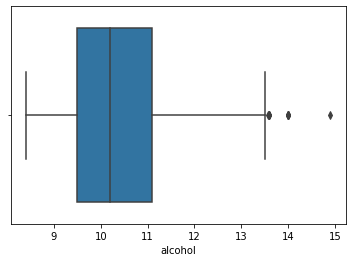

In [11]:
# visualisasikan data alcohol
sns.boxplot(x=wine['alcohol'])

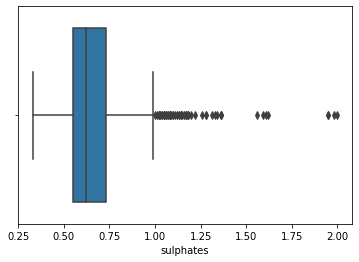

In [12]:
# visualisasikan data sulphates
sns.boxplot(x=wine['sulphates'])

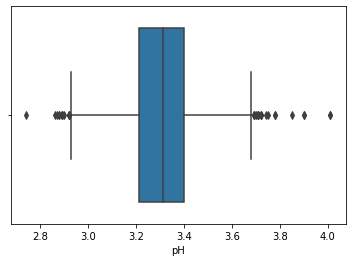

In [13]:
# visualisasikan data pH
sns.boxplot(x=wine['pH'])

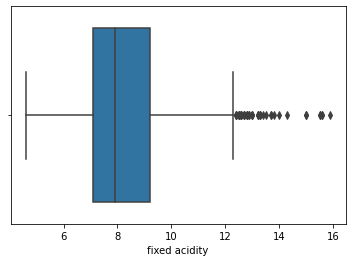

In [14]:
# visualisasikan data fixed acidity
sns.boxplot(x=wine['fixed acidity'])

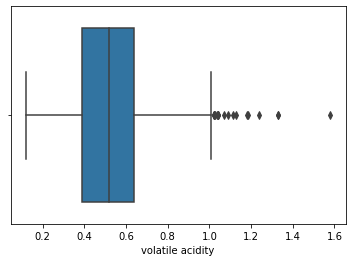

In [15]:
# visualisasikan data volatile acidity
sns.boxplot(x=wine['volatile acidity'])

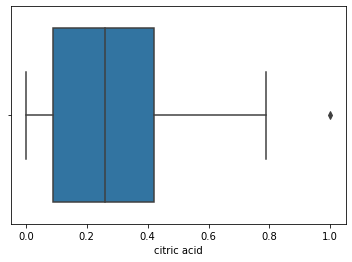

In [16]:
# visualisasikan data citric acid
sns.boxplot(x=wine['citric acid'])

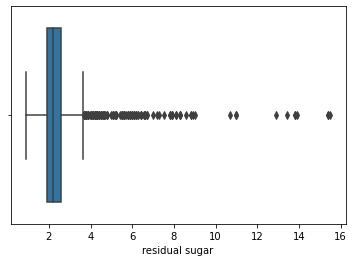

In [17]:
# visualisasikan data residual sugar
sns.boxplot(x=wine['residual sugar'])

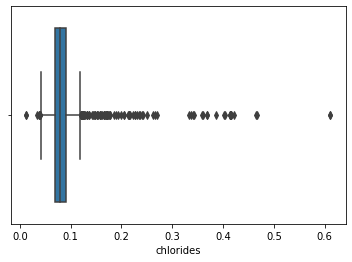

In [18]:
# visualisasikan data chlorides
sns.boxplot(x=wine['chlorides'])

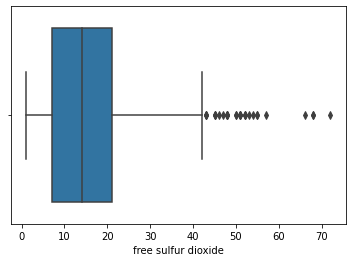

In [19]:
# visualisasikan data free sulfur dioxide
sns.boxplot(x=wine['free sulfur dioxide'])

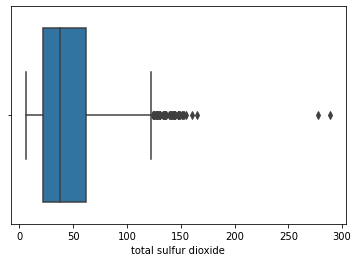

In [20]:
# visualisasikan data total sulfur dioxide
sns.boxplot(x=wine['total sulfur dioxide'])

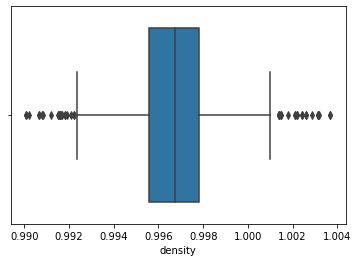

In [21]:
# visualisasikan data density
sns.boxplot(x=wine['density'])

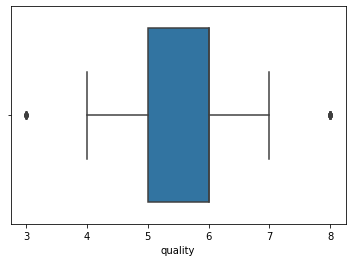

In [22]:
# visualisasikan data quality
sns.boxplot(x=wine['quality'])

**Menangani Outlier**

In [14]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR=Q3-Q1
wine=wine[~((wine<(Q1-1.5*IQR))|(wine>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
wine.shape

(1179, 12)

**Visualisasi Fitur Numerik**

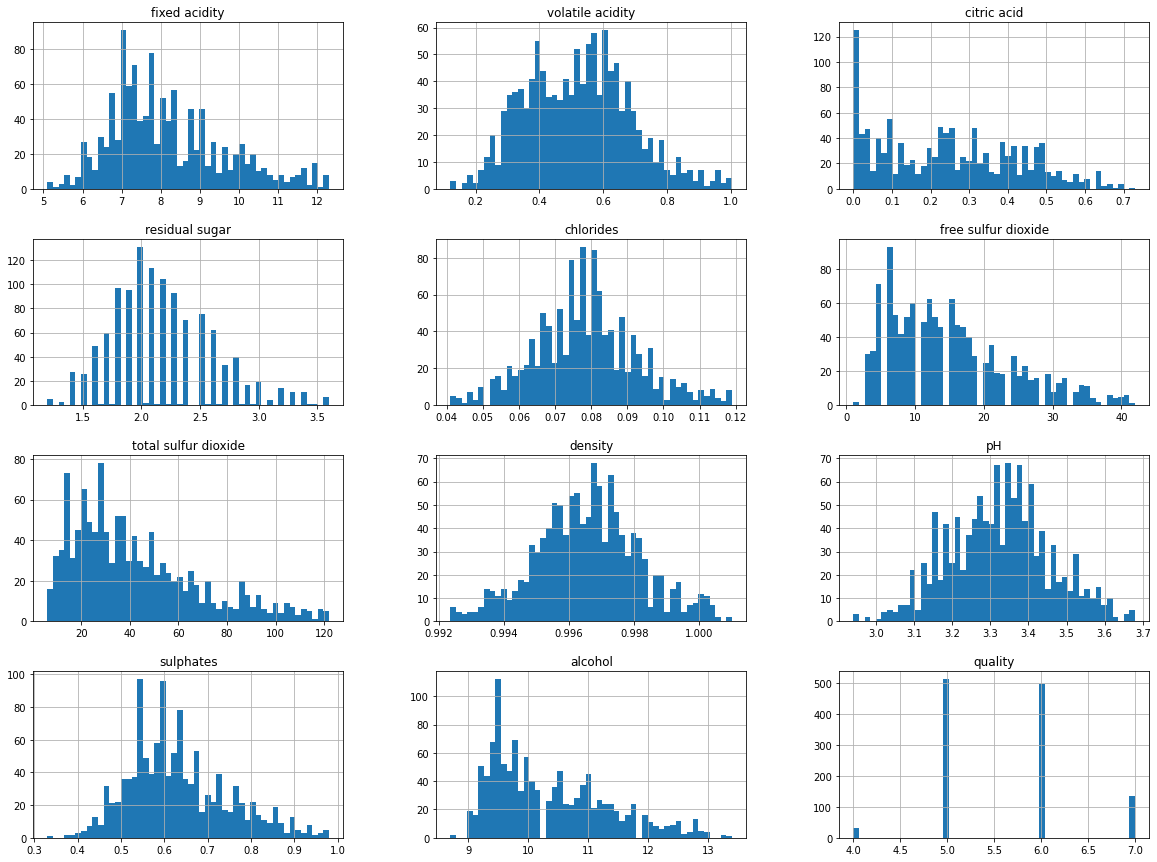

In [15]:
wine.hist(bins=50, figsize=(20,15))
plt.show()

**Multivariate Analysis**

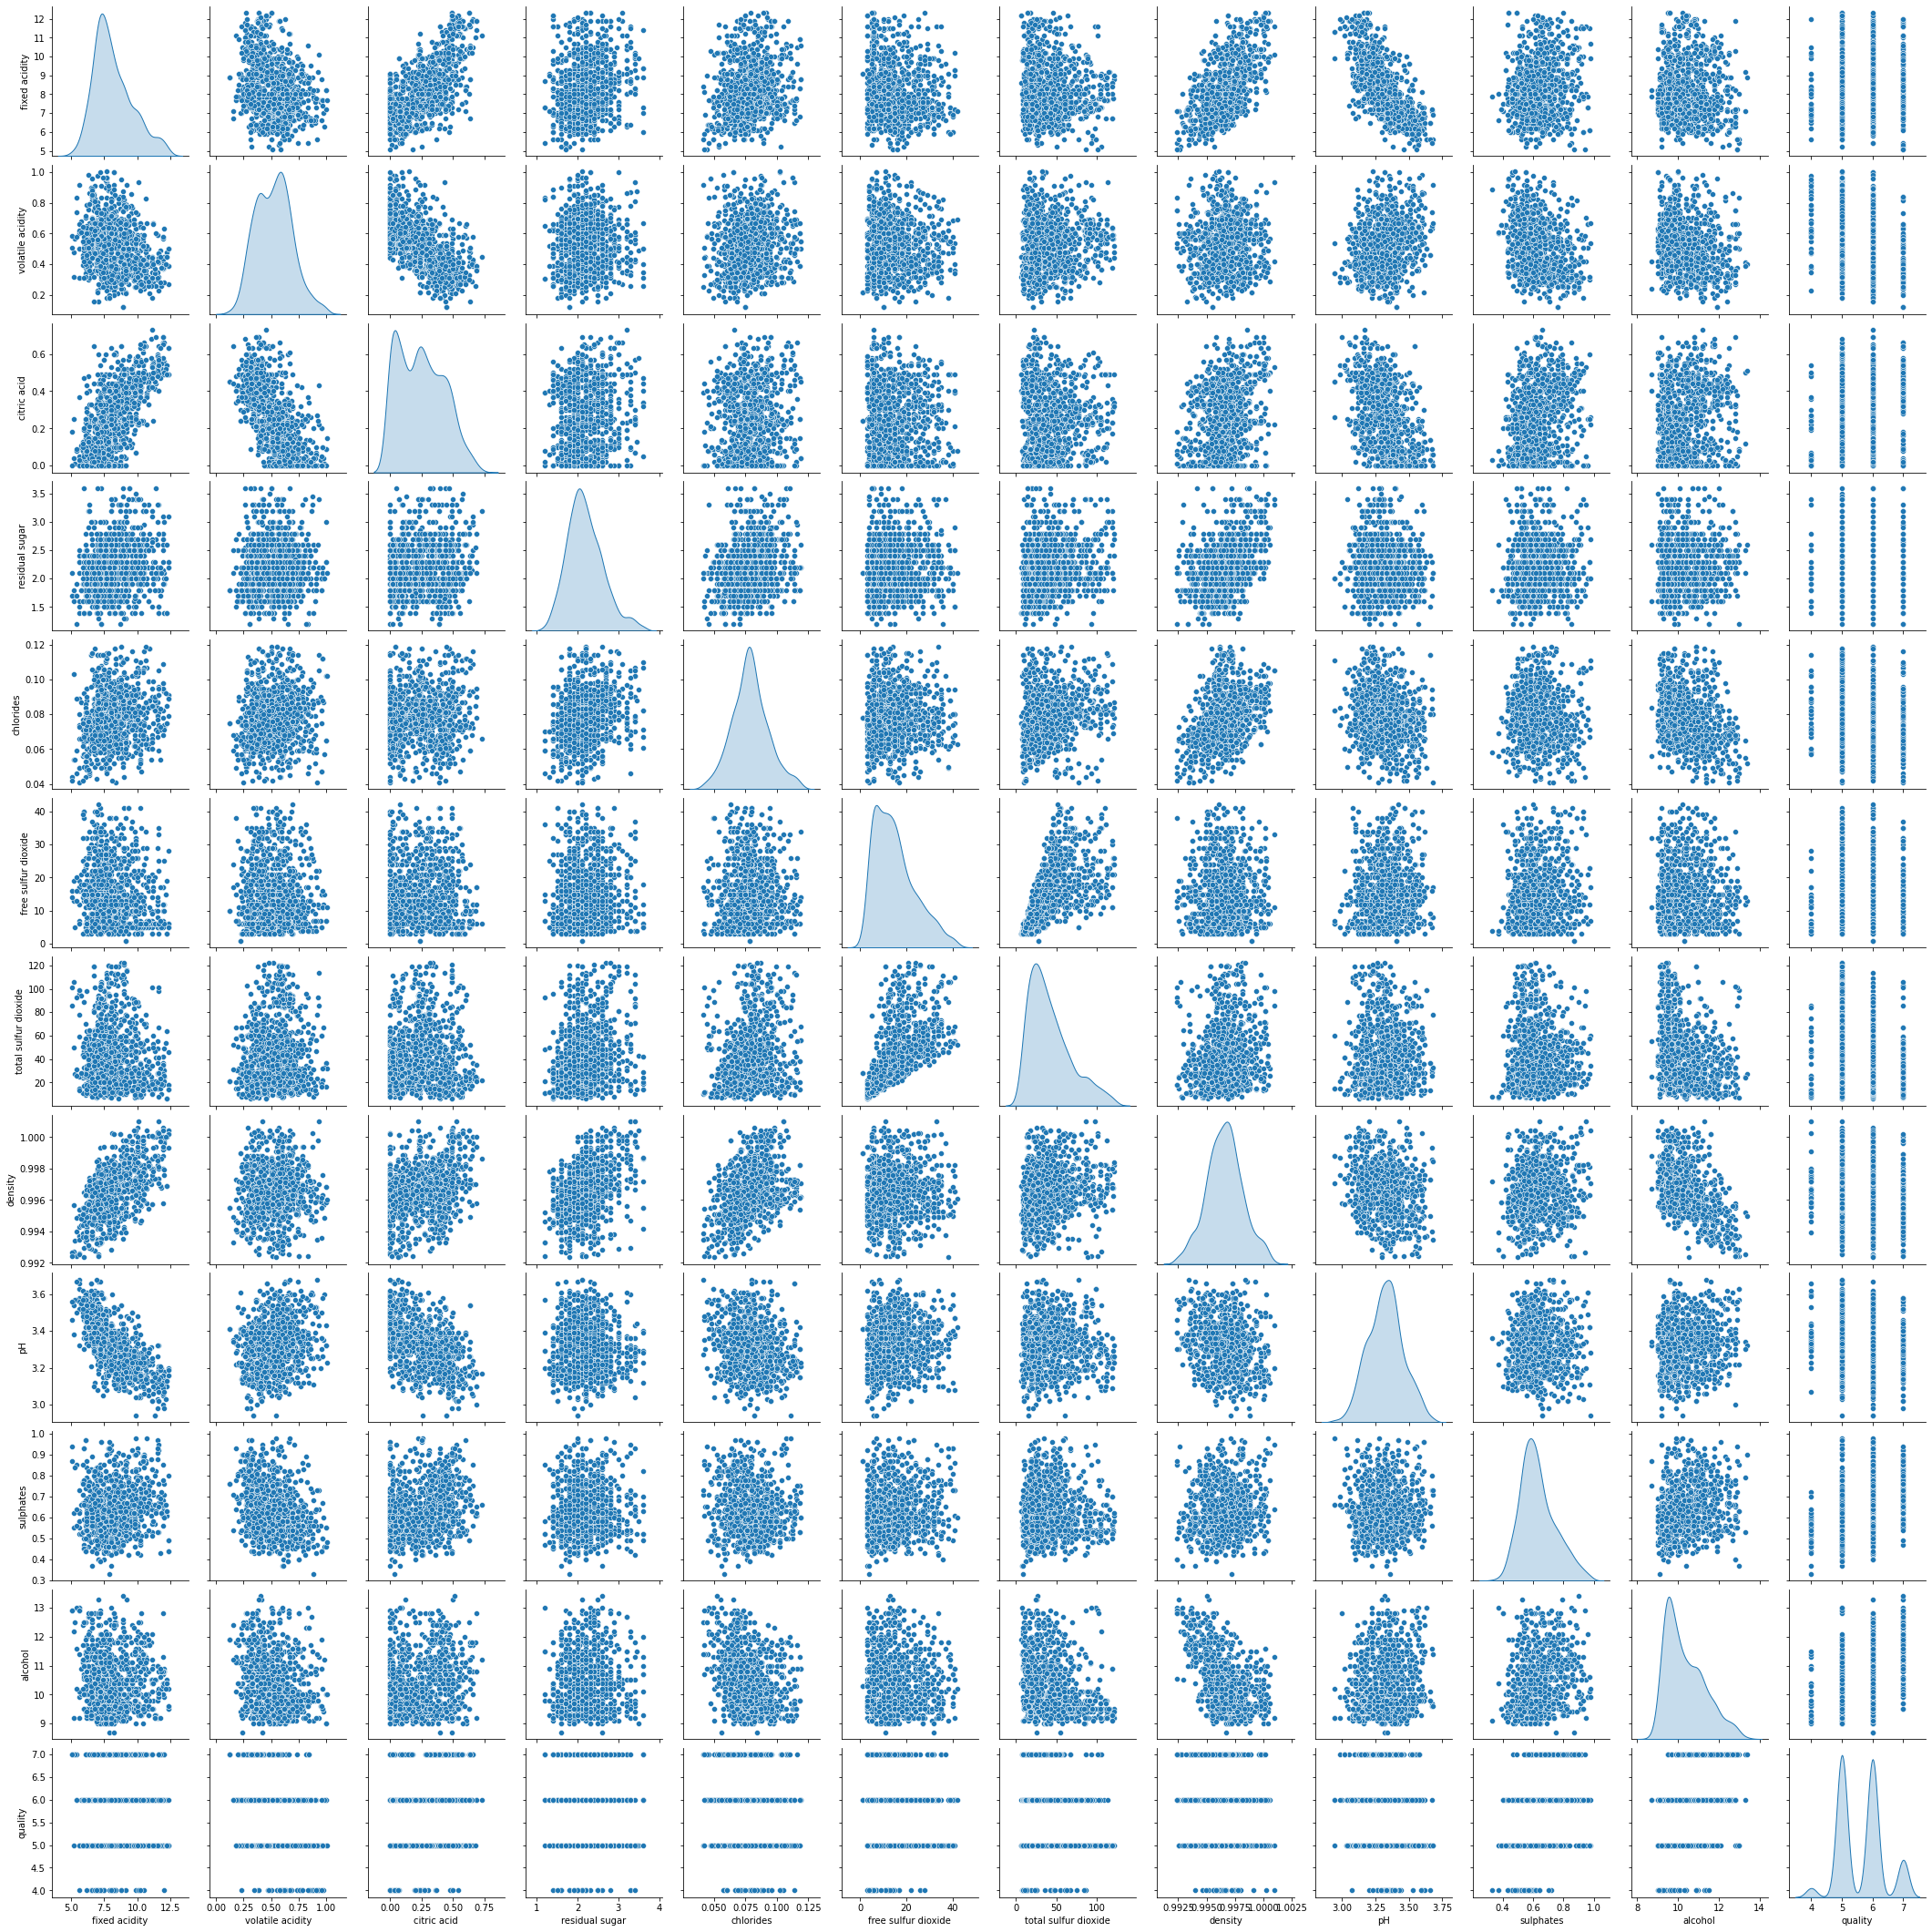

In [16]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(wine, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

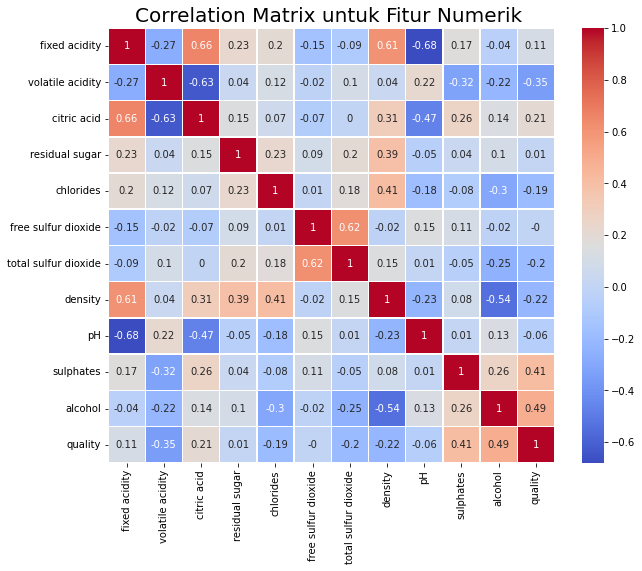

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = wine.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [18]:
#drop variable yang tidak memiliki korelasi
wine.drop(['residual sugar','pH', 'free sulfur dioxide'], inplace=True, axis=1)
wine.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


**Split dataset dengan ukuran 80:20**

In [19]:
from sklearn.model_selection import train_test_split

#melakukan pembagian data untuk test dan train
X = wine.drop(["quality"],axis =1)
y = wine["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [20]:
#menampilkan total pembagian data
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1179
Total # of sample in train dataset: 943
Total # of sample in test dataset: 236


**Standarisasi**

In [21]:
from sklearn.preprocessing import StandardScaler

#melakukan standarisasi untuk fitur numerik
numerical_features = ['alcohol', 'sulphates', 'density','total sulfur dioxide', 'chlorides','citric acid','volatile acidity','fixed acidity']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,alcohol,sulphates,density,total sulfur dioxide,chlorides,citric acid,volatile acidity,fixed acidity
698,-0.673854,-0.875942,2.172614,1.134441,0.575994,0.196190,0.532994,0.862216
1543,0.046702,-0.527523,0.613184,-0.896516,-1.016046,0.976342,-0.527436,2.033886
317,0.046702,0.082209,1.275323,1.211081,0.229898,-0.695412,1.472232,1.000060
940,2.105431,1.127465,-0.927681,-0.666596,-0.323854,1.533593,-1.193992,1.000060
433,-0.879727,-1.224360,2.358260,-0.934836,0.852871,2.146570,-0.830416,2.860947


In [22]:
# mengecek nilai mean dan standar deviasi pada setelah proses standarisasi
X_train[numerical_features].describe().round(4)

,alcohol,sulphates,density,total sulfur dioxide,chlorides,citric acid,volatile acidity,fixed acidity
count,943.0000,943.0000,943.0000,943.0000,943.0000,943.0000,943.0000,943.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005
min,-1.7032,-2.2696,-2.6171,-1.3947,-2.6081,-1.3641,-2.4665,-2.1014
25%,-0.8797,-0.7017,-0.6740,-0.7816,-0.6700,-0.9183,-0.7698,-0.7230
50%,-0.2621,-0.1791,0.0067,-0.2451,-0.0470,-0.0267,0.0179,-0.2405
75%,0.6643,0.6048,0.6256,0.5405,0.6452,0.8092,0.6845,0.5865
max,3.1348,3.0438,2.7296,3.0504,2.7910,2.7038,2.8962,2.8609


**Penyiapan dataframe untuk analisis hasil model**

In [23]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

**Modelling dengan KNN**

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

**Modelling dengan Random Forest**

In [25]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)   

**Modelling dengan Boosting**

In [26]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

**Persiapan dan Penghitungan Mean Squared Error masing-masing algoritme**

In [27]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
# Panggil mse
mse

,train,test
KNN,0.000278,0.000757
RF,0.000046,0.000774
Boosting,0.000312,0.000808


**Visualiasi chart bar Hasil penghitungan Mean Squared Error masing-masing algoritma**

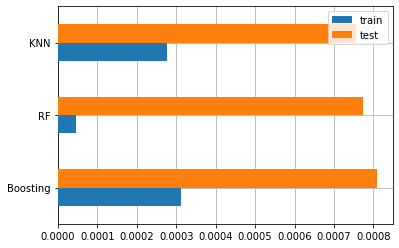

In [28]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

**Hasil Prediksi berdasarkan penghitungan Mean Squared Error masing-masing algoritma**

In [29]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
211,6,5.0,6.0,6.1
